## 基礎題 - 算出斜率w與截距b

y = wx + b

記得計算前X須符合資料格式
$$[x_1, x_2, \ldots, x_{50}]$$

==> 

$$[[x_1], [x_2], \ldots, [x_{50}]]$$

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])
y = np.array([ 0.85848224, -0.10657947,  1.42771901,  0.53554778,  1.20216826,
        1.81330509,  1.88362644,  2.23557653,  2.7384889 ,  3.41174583,
        4.08573636,  3.82529502,  4.39723111,  4.8852381 ,  4.70092778,
        4.66993962,  6.05133235,  5.44529881,  7.22571332,  6.79423911,
        7.05424438,  7.00413058,  7.98149596,  7.00044008,  7.95903855,
        9.96125238,  9.06040794,  9.56018295,  9.30035956,  9.26517614,
        9.56401824, 10.07659844, 11.56755942, 11.38956185, 11.83586027,
       12.45642786, 11.58403954, 11.60186428, 13.88486667, 13.35550112,
       13.93938726, 13.31678277, 13.69551472, 14.76548676, 14.81731598,
       14.9659187 , 15.19213921, 15.28195017, 15.97997265, 16.41258817])

In [3]:
# x：一維, 🌟回歸時要二維
x.shape

(50,)

In [4]:
X = x.reshape(-1,1)
X.shape

(50, 1)

In [5]:
#匯入在sklearn.linear_model套件裡面的LinearRegression模型
#將模型工具指派給一變數做使用
#注意轉換x得格式1D->2D
#將x,y資料導入LinearRegression演算法做訓練
#列印出訓練完成之函數的斜率與截距

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X, y)
print('Coefficients: ', lr.coef_)
print('interception: ', lr.intercept_)

Coefficients:  [1.61701852]
interception:  0.27312968949421723


畫圖：

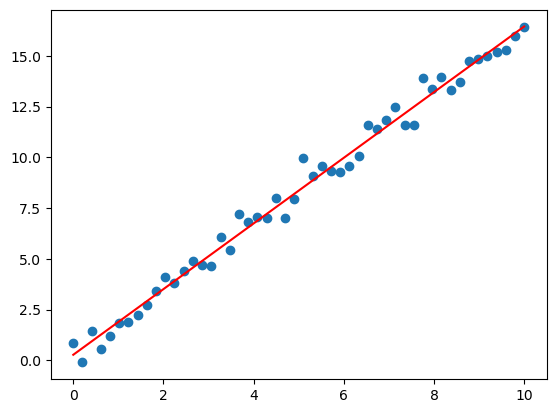

In [6]:
Y = lr.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')

## 進階題 - 切割資料集分別做訓練與預測(訓練資料80%、測試資料20%)


In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])
y = np.array([ 0.85848224, -0.10657947,  1.42771901,  0.53554778,  1.20216826,
        1.81330509,  1.88362644,  2.23557653,  2.7384889 ,  3.41174583,
        4.08573636,  3.82529502,  4.39723111,  4.8852381 ,  4.70092778,
        4.66993962,  6.05133235,  5.44529881,  7.22571332,  6.79423911,
        7.05424438,  7.00413058,  7.98149596,  7.00044008,  7.95903855,
        9.96125238,  9.06040794,  9.56018295,  9.30035956,  9.26517614,
        9.56401824, 10.07659844, 11.56755942, 11.38956185, 11.83586027,
       12.45642786, 11.58403954, 11.60186428, 13.88486667, 13.35550112,
       13.93938726, 13.31678277, 13.69551472, 14.76548676, 14.81731598,
       14.9659187 , 15.19213921, 15.28195017, 15.97997265, 16.41258817])

## 用訓練資料來 fit 函數
1. 只用訓練資料集的資料進行linear regression演算法<br>
2. 並計算出訓練階段的MSE
3. 畫出目標點(藍色)與預測點(紅色)的對應圖
![](images/LR_train.PNG)

In [15]:
#匯入在sklearn.linear_model套件裡面的LinearRegression模型
#匯入在sklearn.model_selection套件裡面的train_test_split模組
#切割數據集(訓練資料80%、測試資料20%，設定random_state=20)
#畫出「訓練資料集」的matplotlib圖形m

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 20)
print(x_train)
# x_train.shape（一維）

# ML要資料轉換
X_train = x_train.reshape(-1,1)
lr.fit(X_train,y_train)
Y_train = lr.predict(X_train)

# X_train.shape（二維）

[ 8.16326531  3.46938776  3.67346939  0.          5.51020408  6.73469388
  7.34693878  8.57142857  2.04081633  0.6122449   8.36734694  2.65306122
  9.3877551   0.40816327  7.75510204  7.95918367  1.02040816  8.7755102
  7.55102041  6.12244898  1.2244898   5.91836735  3.26530612  3.87755102
 10.          8.97959184  4.28571429  6.53061224  6.93877551  1.42857143
  4.48979592  2.24489796  4.08163265  1.83673469  9.79591837  5.71428571
  6.32653061  3.06122449  5.30612245  7.14285714]


0.2284495300761316


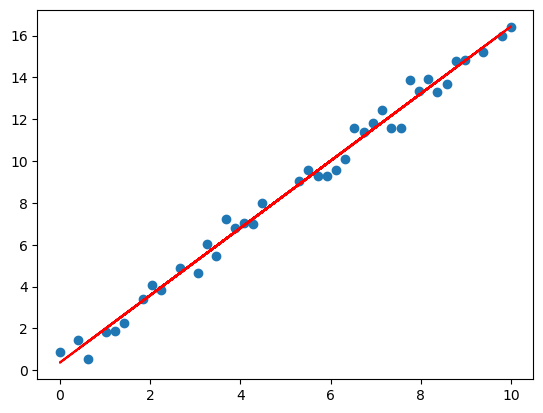

In [16]:
# .scatter 散步圖（原始點）
plt.scatter(x_train, y_train)

# ML 訓練出來的 Model 函示 🌟 x 都是小寫
# 🌟（c = ）'r'
plt.plot(x_train, Y_train, 'r')

# 訓練階段的MSE
MSE = np.sum((Y_train - y_train)**2) / len(y_train)
print(MSE)

## 將訓練出來的函數預測 測試集 的X值
1. 使用剛剛訓練出來的模型進行測試資料集的資料預測*注意reshape<br>
使用X = 2.44897959，預測出來數值應該為 4.3025375<br>
所有測試集資料
$$\widehat{y}=xw+b=w_{1}x_{1}+b$$

In [26]:
W = lr.coef_
b = lr.intercept_
W*2.44897959 + b

array([4.3025375])

2. 並計算出測試階段的MSE

In [46]:
# test 也做 ML 要資料轉換
X_test = x_test.reshape(-1,1)
lr.fit(X_test,y_test)
Y_test = lr.predict(X_test)


MSE_test = np.sum((Y_test - y_test)**2) / len(y_test)
print(MSE_test)

0.36005300734508916


畫圖：

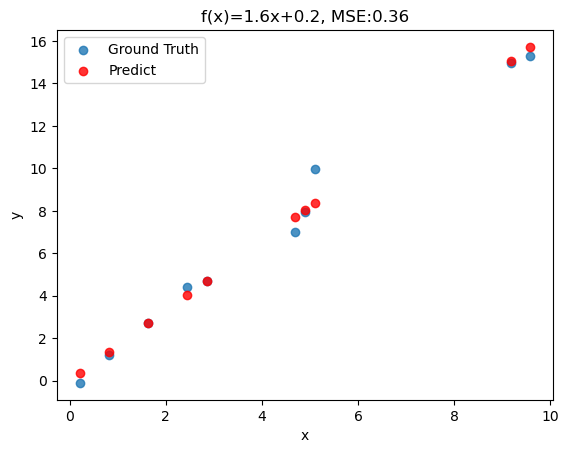

In [59]:
# ❓🌟MSE
# MSE 取 test 的才是 final ANS, 取到小數點第2位： 預測＆真實 差0.44
# round() 小數點後取2位（四捨五入）的方法
# title：正確答案
# Ground Truth：基準真相

title='f(x)=1.6x+0.2'+', MSE:'+str(round(MSE_test,2))
plt.title(title)
plt.xlabel('x')
plt.ylabel('y')
#plt.grid(True)
plt.scatter(x_test, y_test, alpha = 0.8, label = 'Ground Truth')
plt.scatter(x_test, Y_test, c = 'r', alpha = 0.8,label = 'Predict')
plt.legend()

3. 畫出目標點(藍色)與預測點(紅色)的對應圖
![](images/LR_test.PNG)